## 1. Сбор, просмотр данных.

Данные взяты с https://worldhappiness.report.

Для прочтения файла загружаем библиотеку pandas.

In [1]:
import pandas as pd

In [2]:
happiness2023 = pd.read_csv("WHR2023.csv")
happiness2023

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


При просмотре датасета мы видим 5 верхних строчек (head) и 5 нижних (tail) и всего количество строк и столбцов (137 x 19).

## 2. Оценка качества и объема датасета.

In [3]:
happiness2023.shape

(137, 19)

In [4]:
happiness2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

## 3. Обработка и очистка датасета.

### 3.1 Удалим столбцы с ненужными данными.

In [5]:
happiness2023 = happiness2023.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual'],   axis = 1)
happiness2023

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379
...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891


### 3.2 Переименуем столбцы датасета.

In [6]:
happiness2023.rename(columns = { 'Country name':'Страна', 'Ladder score':'Рейтинг', 'Logged GDP per capita':'ВВП на душу населения', 'Social support':'Социальная поддержка', 'Healthy life expectancy':'Ожидаемая продолжительность здоровой жизни', 'Freedom to make life choices':'Свобода жизненного выбора', 'Generosity':'Щедрость', 'Perceptions of corruption':'Восприятие коррупции'}, inplace = True)
happiness2023

,Страна,Рейтинг,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода жизненного выбора,Щедрость,Восприятие коррупции
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379
...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891


### 3.3 Проверим наличие нулевых значение в датасете.

In [7]:
happiness2023.isnull().sum()

Страна                                        0
Рейтинг                                       0
ВВП на душу населения                         0
Социальная поддержка                          0
Ожидаемая продолжительность здоровой жизни    1
Свобода жизненного выбора                     0
Щедрость                                      0
Восприятие коррупции                          0
dtype: int64

In [8]:
happiness2023 = happiness2023.dropna()
happiness2023.isnull().sum()

Страна                                        0
Рейтинг                                       0
ВВП на душу населения                         0
Социальная поддержка                          0
Ожидаемая продолжительность здоровой жизни    0
Свобода жизненного выбора                     0
Щедрость                                      0
Восприятие коррупции                          0
dtype: int64

### 4. Анализ данных, расчет показателей, поиск взаимосвязей.

### 4.1 Получим первичное представление о статистических характеристиках нашего датасета.

In [9]:
happiness2023.describe()

,Рейтинг,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода жизненного выбора,Щедрость,Восприятие коррупции
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.544441,9.455191,0.798632,64.967632,0.788081,0.023566,0.724588
std,1.142841,1.210107,0.129597,5.750390,0.112498,0.141604,0.177353
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.702500,8.587250,0.721000,60.648500,0.726250,-0.071000,0.666000
50%,5.693500,9.574500,0.826500,65.837500,0.801000,0.002000,0.772500
75%,6.342500,10.540250,0.896000,69.412500,0.874750,0.117500,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


### 4.2 Для изучения отношений между числовыми столбцами датасета загрузим библиотеки NumPy, Matplotlib и Seaborn.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

D:\Data analyst\New_Workplace\ve\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


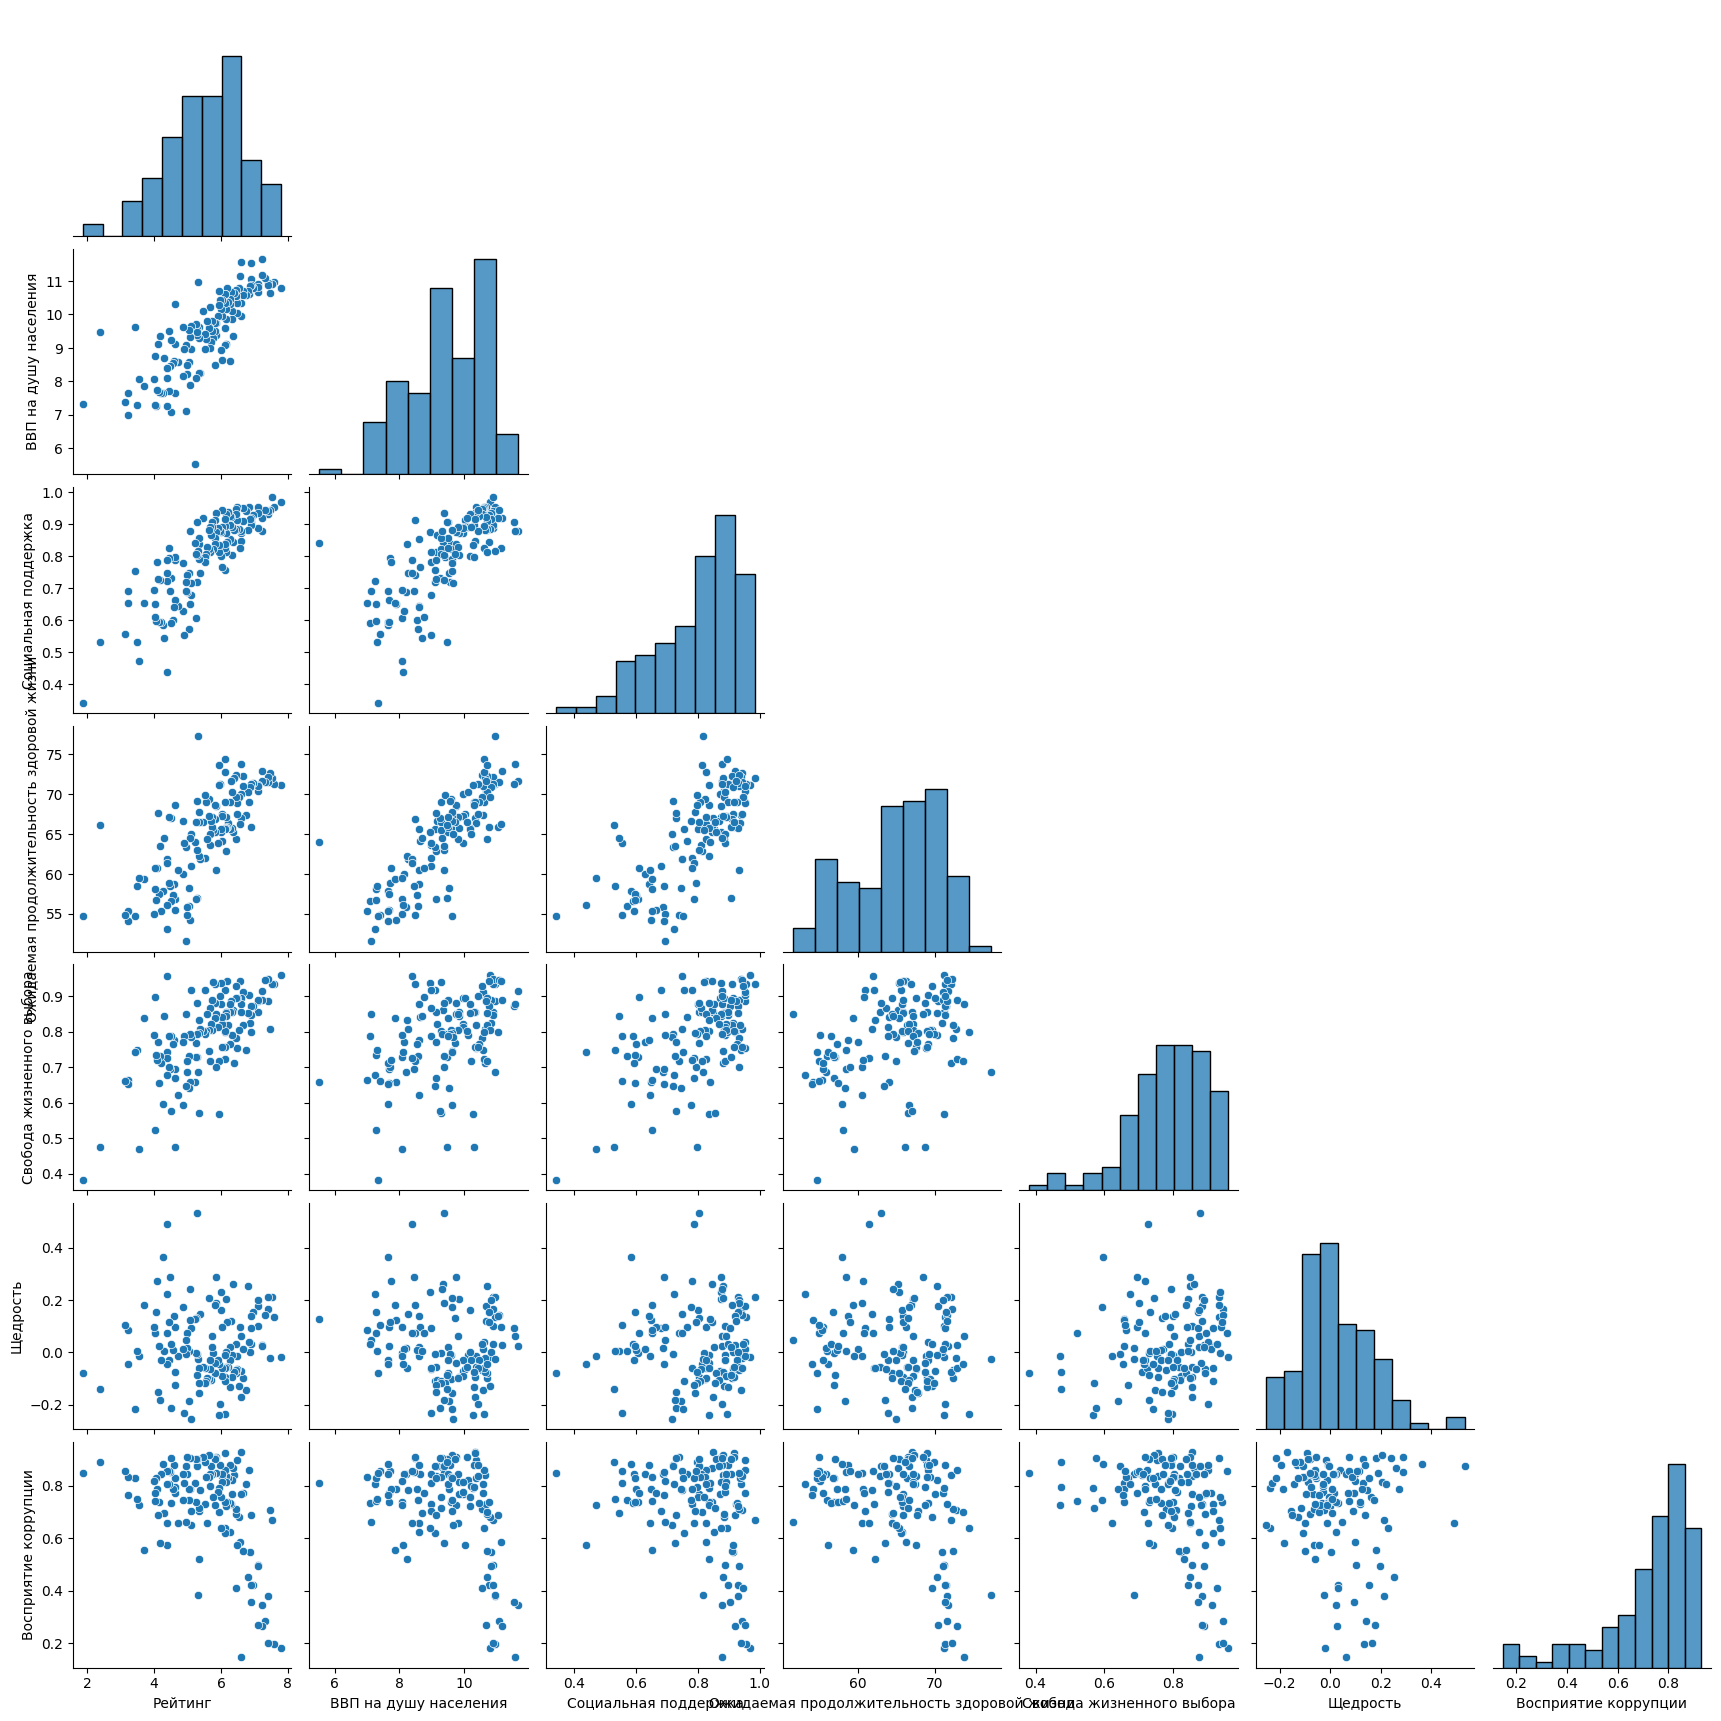

In [11]:
sns.pairplot(happiness2023, corner=True)

Для значений из диаграмм, в которых видна линейная зависимость, нарисуем тепловую карту.

In [14]:
df_1 = happiness2023[['Рейтинг', 'ВВП на душу населения', 'Социальная поддержка', 'Ожидаемая продолжительность здоровой жизни', 'Свобода жизненного выбора']]

<Axes: >

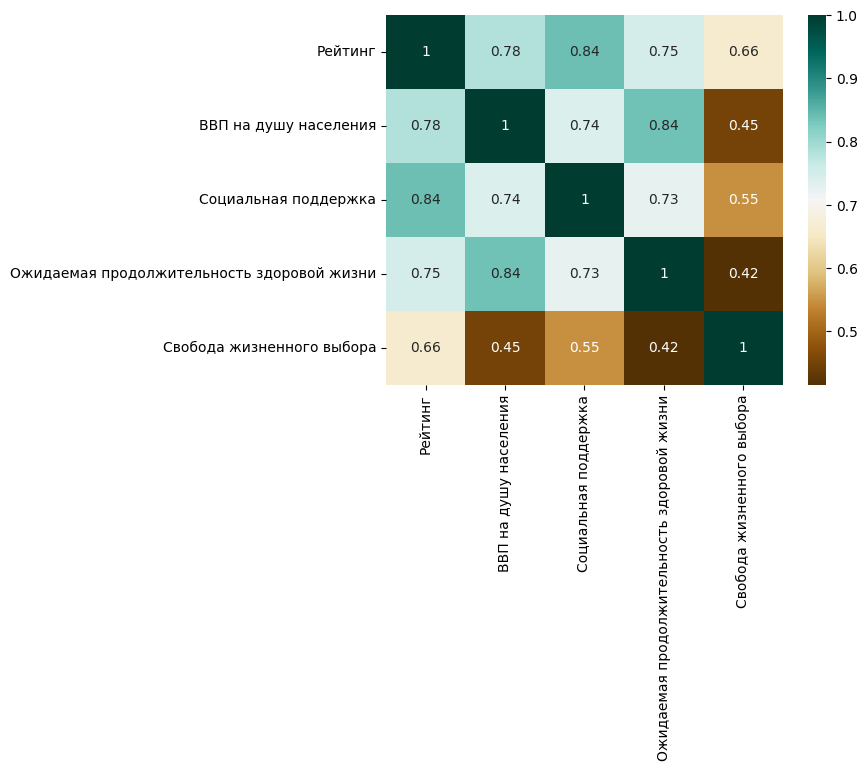

In [15]:
sns.heatmap(df_1.corr(), annot=True, cmap='BrBG')

Стоит обратить внимание на признаки с высокой корреляцией — тёмно-зеленые клетки. Близость к единице означает сильно выраженную положительную линейную зависимость. Это наблюдается у Рейтинга и Социальной поддержки, также у ВВП и Продолжительности здоровой жизни.

### 4.3 Для пар с самой сильной корреляцией применим линейную регрессию используя  библиотеку Statsmodels и входящий в нее модуль линейной регрессии Linear Regression.

In [17]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import statsmodels.formula.api as smf

In [40]:
df_2 = df_1[['Рейтинг','Социальная поддержка']]

In [43]:
df_2.rename(columns = { 'Рейтинг':'Score', 'Социальная поддержка':'SocialSupport'}, inplace = True)            
df_2                    

C:\Users\Алёна\AppData\Local\Temp\ipykernel_14912\2985273196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = { 'Рейтинг':'Score', 'Социальная поддержка':'SocialSupport'}, inplace = True)


,Score,SocialSupport
0,7.804,0.969
1,7.586,0.954
2,7.530,0.983
3,7.473,0.943
4,7.403,0.930
...,...,...
132,3.207,0.652
133,3.204,0.690
134,3.138,0.555
135,2.392,0.530


In [44]:
model = smf.ols('Score ~ SocialSupport' ,data = df_2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     316.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           4.49e-37
Time:                        10:57:06   Log-Likelihood:                -128.23
No. Observations:                 136   AIC:                             260.5
Df Residuals:                     134   BIC:                             266.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3577      0.336     -1.064

In [45]:
result.rsquared

0.7023386183142355

In [46]:
result.params

Intercept       -0.357737
SocialSupport    7.390357
dtype: float64

На основании результатов регрессии OLS модель имеет значение R-квадрата 0,702, что указывает на то, что 70,2% изменчивости зависимой переменной Score можно объяснить независимой переменной SocialSupport. В целом, регрессионная модель хорошо подходит, о чем свидетельствует высокое значение R-квадрата и статистически значимый коэффициент для переменной SocialSupport.